In [2]:
import numpy as np
from skfem import *
from skfem.supermeshing import intersect, elementwise_quadrature
from skfem.models.elasticity import (linear_elasticity, lame_parameters,
                                     linear_stress)
from skfem.helpers import dot, sym_grad, jump, mul
from skfem.io.json import from_file

from pathlib import Path
import pandas as pd 
import json 
import matplotlib.pyplot as plt 
from skfem.mesh.mesh  import Mesh
from skfem.visuals.matplotlib import plot, draw
from meshio.stl import _stl
import stl
from stl import mesh

import skfem as fem 
from skfem.helpers import dot, grad 


[ 0.          0.          0.         ... -0.01113888 -0.01270551
 -0.01050343]


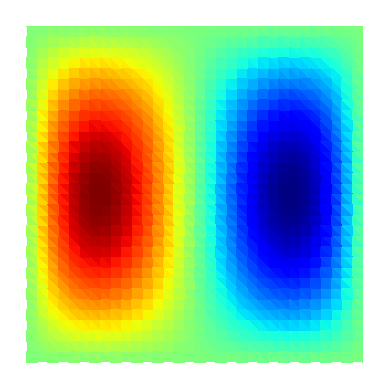

In [133]:

@fem.BilinearForm
def a(u,v,_): 
    return dot(grad(u), grad(v))
    
    
import numpy as np

@fem.LinearForm
def L(v,w): 
    x, y = w.x 
    f= np.cos(np.pi*x)*np.sin(np.pi*y)
    #f = np.sin(np.pi*x)
    return f*v


mesh = fem.MeshTri().refined(5)
Vh = fem.Basis(mesh, fem.ElementTriP1())



A = a.assemble(Vh) 
l = L.assemble(Vh)  # lastvektor 

D = Vh.get_dofs()


x = fem.solve(*fem.condense(A, l, D=D))

plot(mesh, x)

print(x)

In [ ]:
@fem.Functional

def error(w):

    x, y = w.x

    uh = w['uh']

    u = np.sin(np.pi * x) * np.sin(np.pi * y) / (2. * np.pi ** 2)

    return (uh - u) ** 2

str(round(error.assemble(Vh, uh=Vh.interpolate(x)), 9))


array([[0]])